In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('recipe_site_traffic_2212.csv')

In [100]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


![](valid_data.png)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [102]:
data["recipe"].head()

0    1
1    2
2    3
3    4
4    5
Name: recipe, dtype: int64

In [103]:
data["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [104]:
print(data.isna().sum().sort_values())

recipe            0
category          0
servings          0
calories         52
carbohydrate     52
sugar            52
protein          52
high_traffic    373
dtype: int64


In [105]:
data.duplicated(subset='recipe').sum()

0

In [106]:
data

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


## Cleaning Data

In [107]:
#servings col has string 'as a snack' after number so I need to remove string 'as a snack'
data['servings'] = data['servings'].str.replace('as a snack','')

In [108]:
data['servings']= data['servings'].astype(int)

In [109]:
data['category'] = data['category'].str.replace(' Breast','')

In [110]:
data.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings          int64
high_traffic     object
dtype: object

In [111]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [112]:
print(data.category.unique().tolist())

['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']


In [113]:
print(data.isna().sum().sort_values())

recipe            0
category          0
servings          0
calories         52
carbohydrate     52
sugar            52
protein          52
high_traffic    373
dtype: int64


In [114]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Handling Missing Values

Impute nan values with mean category and servings from recipe

In [115]:
nutr =['calories', 'carbohydrate', 'sugar', 'protein']

In [116]:
data[nutr] = data.groupby(['category','servings'])[nutr].transform(lambda x: x.fillna(x.median()))

In [117]:
data["high_traffic"] = data["high_traffic"].fillna("0")

In [118]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,538.52,11.83,2.53,35.12,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,0


# Handling Outliers

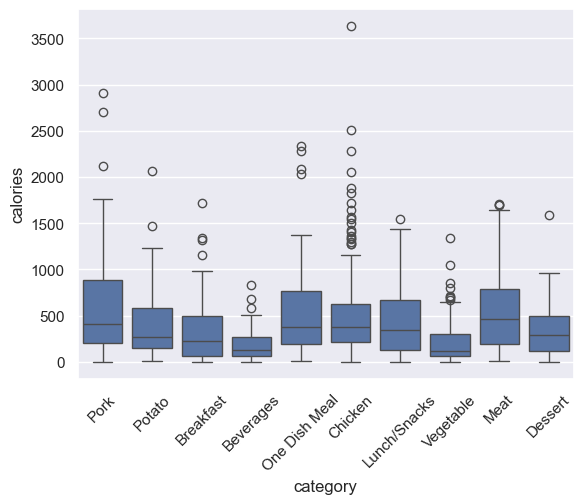

In [119]:
sns.boxplot(data=data, x="category",y="calories")
plt.xticks(rotation=45)
plt.show()

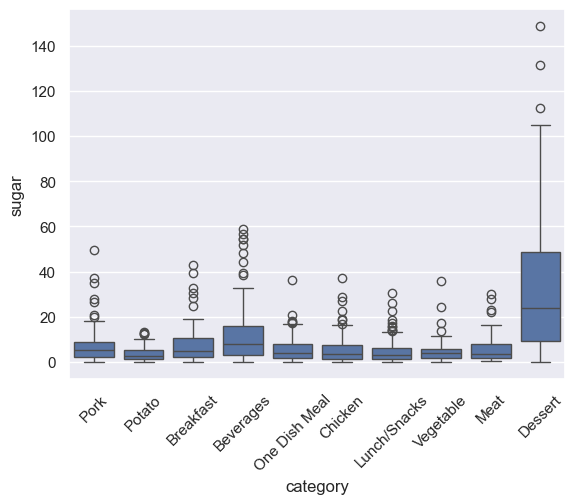

In [120]:
sns.boxplot(data=data, x="category",y="sugar")
plt.xticks(rotation=45)
plt.show()

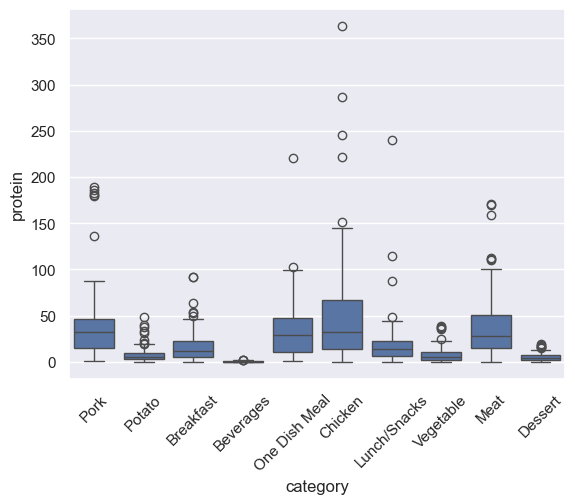

In [121]:
sns.boxplot(data=data, x="category",y="protein")
plt.xticks(rotation=45)
plt.show()

Since duplicates is less than 5 percent we can remove it

In [122]:
data = data.set_index('recipe')
duplicates = data[data.duplicated()]
duplicates

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
90,538.520,11.830,2.530,35.120,Pork,6,High
210,239.900,31.550,23.190,3.380,Dessert,2,High
263,368.490,17.280,4.140,25.990,Chicken,4,0
352,327.690,31.005,2.645,6.420,Potato,4,High
355,388.440,19.560,5.900,22.450,Pork,4,High
377,538.520,11.830,2.530,35.120,Pork,6,High
389,301.490,27.540,2.970,17.790,Lunch/Snacks,4,High
428,107.710,12.750,4.500,5.600,Vegetable,4,High
456,538.520,11.830,2.530,35.120,Pork,6,High


In [123]:



# Check for duplicates
duplicates_exist = data.duplicated().any()

# If duplicates exist, drop them
if duplicates_exist:
    data = data.drop_duplicates()
    print("DataFrame without duplicates:")
    print(data)
else:
    print("No duplicates found.")


DataFrame without duplicates:
        calories  carbohydrate  sugar  ...      category servings  high_traffic
recipe                                 ...                                     
1         538.52         11.83   2.53  ...          Pork        6          High
2          35.48         38.56   0.66  ...        Potato        4          High
3         914.28         42.68   3.09  ...     Breakfast        1             0
4          97.03         30.56  38.63  ...     Beverages        4          High
5          27.05          1.85   0.80  ...     Beverages        4             0
...          ...           ...    ...  ...           ...      ...           ...
942       186.21         83.94   1.98  ...       Chicken        4          High
943      1161.00          5.31  22.39  ...  Lunch/Snacks        2             0
945       951.74         29.42   3.57  ...          Pork        2          High
946       266.61         35.77   0.97  ...        Potato        6          High
947       

In [124]:
data = data.reset_index()

In [125]:
data.shape

(922, 8)

In [126]:
import pandas as pd
from scipy.stats import zscore

# Assuming your dataframe is called df
columns_to_check = ['calories', 'carbohydrate', 'sugar', 'protein']

# Calculate z-scores for selected columns
z_scores = zscore(data[columns_to_check])

# Define a threshold for z-scores (e.g., 3 standard deviations)
threshold = 3

# Identify and filter out rows with outliers
outlier_mask = (abs(z_scores) > threshold).any(axis=1)
df_no_outliers = data[~outlier_mask]



In [127]:
# Calculate the IQR for selected columns
Q1 = data[columns_to_check].quantile(0.06)
Q3 = data[columns_to_check].quantile(0.96)
IQR = Q3 - Q1

# Identify and filter out rows with outliers
outlier_mask = ((data[columns_to_check] < (Q1 - 1.5 * IQR)) | (data[columns_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outlier_mask]
data.shape

(912, 8)

# Data Validation

- 1.recipe:numeric values without missing values, matching the description. No cleaning is needed.

- 2.calories:numeric values with missing data, Need Imputation
- 3.carbohydrate:numeric values with missing data, Need Imputation
- 4.sugar:numeric values with missing data, Need Imputation
- 5.protein:numeric values with missing data, Need Imputation
- 6.category:string values,'Chicken Breast' needs to have the string 'Breast' removed.
- 7.servings:string values, it should be numeric instead of an string object. Therefore, need to change it and contains string 'number as snack'.
- 8.high_traffic:string values with missing data, Need Imputation

After the data validation, the dataset contains 922 rows and 8 columns without missing values.



# Exploratory Analysis

I have investigated the target variable and features of the recipe, and the relationship between target variable and features. After the analysis,I decided to apply the following changes to enable modeling:

- Since  we need to predict high_traffic, high_traffic variable would be our target variable. 
- From the barchart we can see the Most high traffic data is marked as high

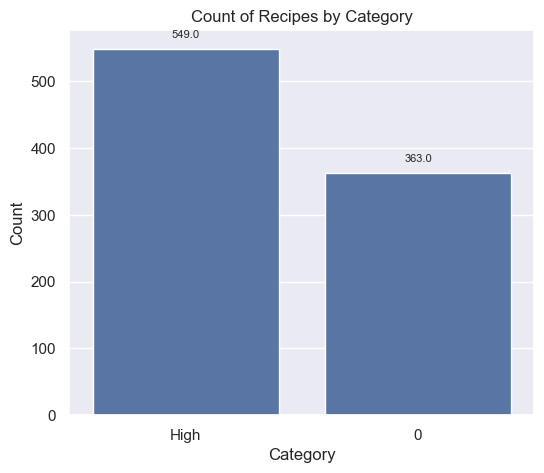

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(6, 5))
sns.set(style="darkgrid")

# Create the count plot
ax = sns.countplot(x='high_traffic', data=data)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Recipes by Category')

# Add the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()



In [129]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,538.52,11.83,2.53,35.12,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,0


In [130]:
data.shape

(912, 8)

In [131]:
data["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [132]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,538.52,11.83,2.53,35.12,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,0


- Count of High Traffic Recipes by Servings

From the provided data, the servings with the highest number are 4, with a total of 237 recipes marked as "High Traffic" and 154 recipes marked as "Not High Traffic." 
This suggests that recipes with 4 servings are the most prevalent in the dataset, 
and they contribute significantly to both high and non-high traffic categories.

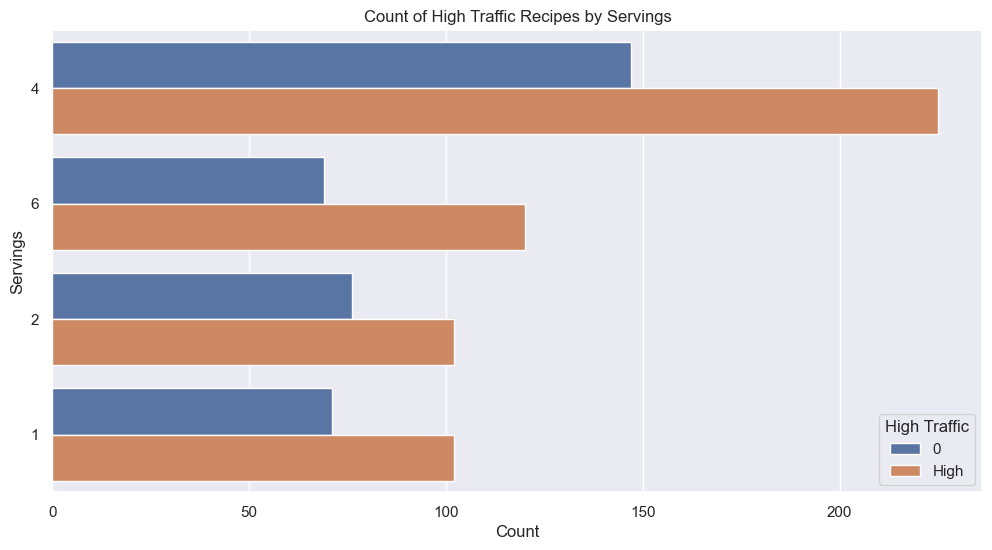

In [133]:
#create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y="servings", hue="high_traffic",order=[4,6,2,1], data=data)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Servings")

plt.title("Count of High Traffic Recipes by Servings")

plt.legend(title="High Traffic")
plt.show()

- Proportions of High-Traffic Recipes by Category

The proportions represent the distribution of recipes marked as "High Traffic" within each category, 
with Vegatables, Potato  and Pork categories having the highest proportions
suggesting a notable prevalence of these categories among recipes likely to attract high traffic.

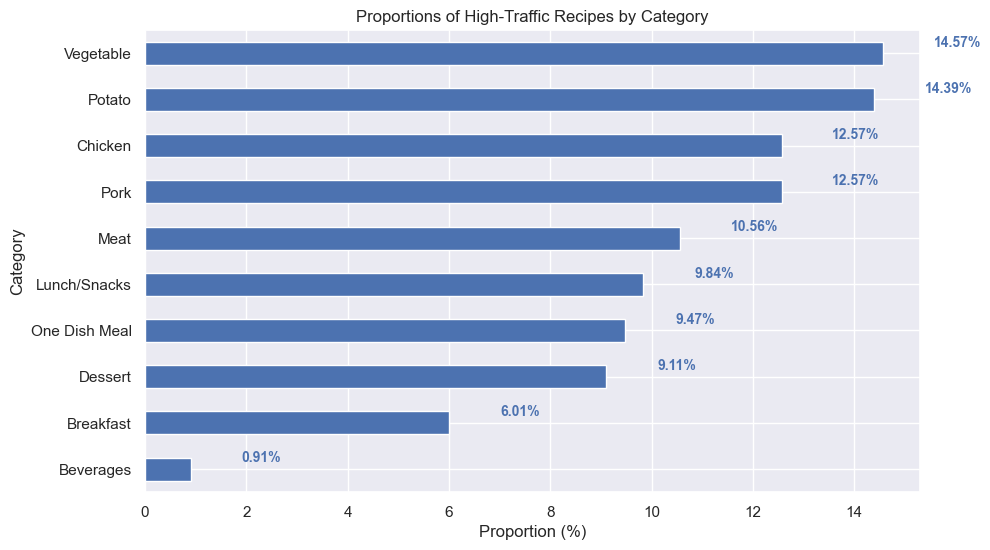

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
df = data
# filter the data to only include recipes marked as "High" in high_traffic column
high_traffic_df = df[df['high_traffic'] == 'High']

# group by category and high_traffic
grouped = high_traffic_df.groupby(['category', 'high_traffic'])

# calculate proportion of 'High' values in each group
proportions = grouped['high_traffic'].count().unstack() / grouped['high_traffic'].count().sum()

# round proportions to percent and change color to navy blue
proportions = (proportions * 100).round(2)
color = sns.color_palette("deep")[0]

# plot the proportions
ax = proportions['High'].sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), color=color)
ax.invert_yaxis()  # reverse the order of the y-axis
plt.xlabel('Proportion (%)')
plt.ylabel('Category')
plt.title('Proportions of High-Traffic Recipes by Category')
# add value labels to the bars
for i, v in enumerate(proportions['High'].sort_values(ascending=False)):
    ax.text(v + 1, i - 0.15, str(v) + '%', color=color, fontsize=10, fontweight='bold')

plt.show()


In [135]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,538.52,11.83,2.53,35.12,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,0


In [136]:
encoded_data_df = data

In [137]:
encoded_data_df_t = pd.concat([encoded_data_df, pd.get_dummies(encoded_data_df['high_traffic'])], axis=1)
encoded_data_df_t.drop('high_traffic', axis=1, inplace=True)

- Nutritions Correlation 

From the heatmap . The correlation matrix indicates that recipes with higher carbohydrates content are positively correlated with popular recipe, and sugar show a negative correlation with popular recipe Suggesting potential associations between nutritional components and recipe popularity.




<AxesSubplot: title={'center': 'Nutritions Correlation with High Traffic'}>

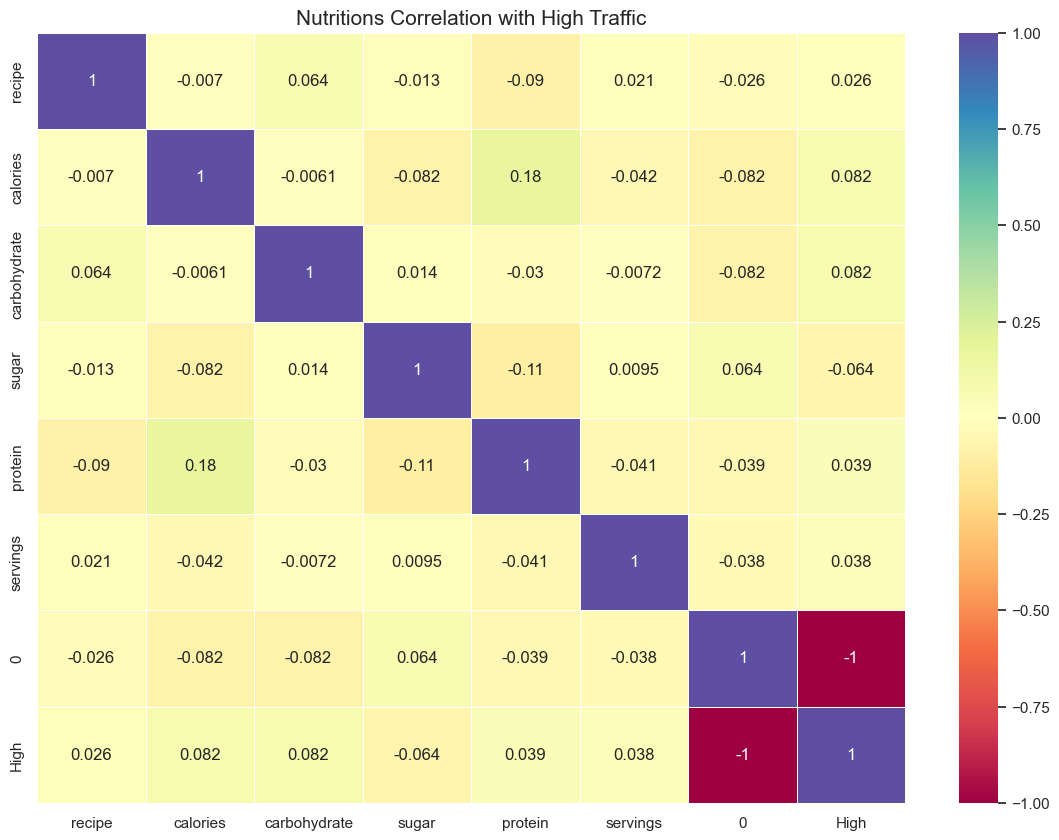

In [138]:
plt.figure(figsize=(14,10))
plt.title("Nutritions Correlation with High Traffic", fontsize=15)
sns.heatmap(encoded_data_df_t.corr(numeric_only=True), linewidth=0.5, center=0, cmap="Spectral", annot=True)

In [139]:
data["high_traffic"].unique()

array(['High', '0'], dtype=object)

# Model Development

Logistic regression 

- Logistic regression is a suitable choice for certain types of problems, particularly binary classification problems where the goal is to predict one of two possible outcomes. 
In this case, e predicting recipe categories, which might be a binary or multiclass classification 
problem. 

Here are some reasons why logistic regression could be a good choice for this problem:
- interpretability: Logistic regression provides easily interpretable results. The coefficients you see in your output indicate the strength and direction of the relationship between each feature and the predicted outcome. This can help you understand which features are more influential in predicting the category.
- Binary Classification: If your problem is a binary classification (e.g., categorizing recipes into two classes like "Popular" and "Not Popular" based on traffic), logistic regression is well-suited. It models the probability of belonging to a particular class and makes predictions in the form of probabilities.

Comparison with Decision Trees and Random Forests

- Decision Trees and Random Forests: Are less interpretable due to the hierarchical nature of decision trees. Random Forests, being an ensemble of decision trees, can be more challenging to interpret. 


- Prepare Data for Modelling

To enable modelling, we chose calories,carbohydrate,sugar,protein,category,servings as features, high_traffic is target variables. I also have made the following changes:

    - Normalize the numeric features
    - Convert categorical variables to numerical using one-hot encoding
    - Split the data into a training set and a test set

In [140]:
data["category"].str.contains("Beverages").sum()

92

In [141]:
df_encoded = data

In [142]:
df_encoded["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [143]:
# Convert categorical variables to numerical using one-hot encoding
#df_encoded = pd.get_dummies(data, columns=['category'])

df_encoded = pd.get_dummies(data, columns=['category'])
#df_encoded= df_encoded.drop(['category'], axis=1)

# Replace 'High' with 1 and '0' with 0 in 'high_traffic' column
df_encoded['high_traffic'] = df_encoded['high_traffic'].map({'High': 1, '0': 0})

# Fill NaN values with 0 in the 'high_traffic' column
df_encoded['high_traffic'] = df_encoded['high_traffic'].fillna(0)

# Split into features (X) and target variable (y)
X = df_encoded.drop(['recipe', 'high_traffic'], axis=1)
y = df_encoded['high_traffic'].astype(int) 


In [144]:
df_encoded

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,1,538.52,11.83,2.53,35.12,6,1,0,0,0,0,0,0,0,1,0,0
1,2,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,0,0,1,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,1,1,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,942,186.21,83.94,1.98,22.40,4,1,0,0,1,0,0,0,0,0,0,0
918,943,1161.00,5.31,22.39,44.22,2,0,0,0,0,0,1,0,0,0,0,0
919,945,951.74,29.42,3.57,13.87,2,1,0,0,0,0,0,0,0,1,0,0
920,946,266.61,35.77,0.97,8.07,6,1,0,0,0,0,0,0,0,0,1,0


In [145]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef

Splitting dataset 80:20

In [146]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print("Train and Test set distribution: ",len(x_train),len(x_test),len(y_train),len(y_test))

Train and Test set distribution:  729 183 729 183


Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [148]:
y_pred = tree_model.predict(x_test)

Logistic regression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [150]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [151]:
lr = LogisticRegression()
lr.fit(x_train_std,y_train)
y_pred = lr.predict(x_test_std)
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")



80.3% accuracy on test set.


In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

acc = accuracy_score(y_test,rf.predict(x_test))
print(f"{acc:.1%} accuracy on test set.")

72.7% accuracy on test set.


In [153]:
feature_coefficients = lr.coef_[0]
feature_names = X.columns

Logistic Regression Test Set Accuracy: 0.8033
Logistic Regression Test Set Precision: 0.7931
Logistic Regression Test Set Recall: 0.8846


Random Forest Test Set Accuracy: 0.7158
Random Forest Test Set Precision: 0.7131
Random Forest Test Set Recall: 0.8365


Decision Tree Test Set Accuracy: 0.6448
Decision Tree Test Set Precision: 0.6789
Decision Tree Test Set Recall: 0.7115




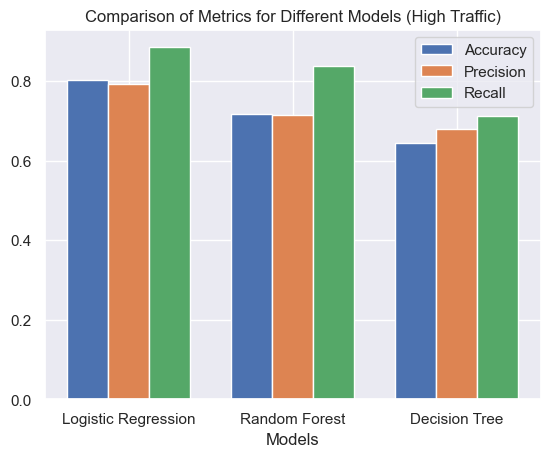

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Lists to store metrics for visualization
accuracy_list = []
precision_list = []
recall_list = []

# Loop through models
for name, model in models.items():
    # Fit the model
    model.fit(x_train_std, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test_std)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming 'High' is encoded as 1
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    # Display the results
    print("{} Test Set Accuracy: {:.4f}".format(name, accuracy))
    print("{} Test Set Precision: {:.4f}".format(name, precision))
    print("{} Test Set Recall: {:.4f}".format(name, recall))
    print("\n")

# Visualize the metrics
labels = list(models.keys())
x = np.arange(len(labels))

fig, ax = plt.subplots()
bar_width = 0.25

rects1 = ax.bar(x - bar_width, accuracy_list, bar_width, label='Accuracy')
rects2 = ax.bar(x, precision_list, bar_width, label='Precision')
rects3 = ax.bar(x + bar_width, recall_list, bar_width, label='Recall')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xlabel('Models')
plt.title('Comparison of Metrics for Different Models (High Traffic)')
plt.show()


Logistic Regression Test Set Accuracy: 0.8033
Logistic Regression Test Set Precision: 0.8209
Logistic Regression Test Set Recall: 0.6962


Random Forest Test Set Accuracy: 0.7432
Random Forest Test Set Precision: 0.7500
Random Forest Test Set Recall: 0.6076


Decision Tree Test Set Accuracy: 0.6284
Decision Tree Test Set Precision: 0.5821
Decision Tree Test Set Recall: 0.4937




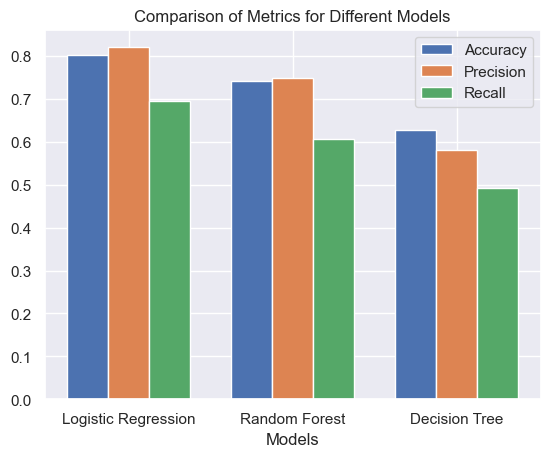

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Lists to store metrics for visualization
accuracy_list = []
precision_list = []
recall_list = []

# Loop through models
for name, model in models.items():
    # Fit the model
    model.fit(x_train_std, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test_std)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0)  # Assuming 'High' is encoded as 1
    recall = recall_score(y_test, y_pred, pos_label=0)
    
    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    # Display the results
    print("{} Test Set Accuracy: {:.4f}".format(name, accuracy))
    print("{} Test Set Precision: {:.4f}".format(name, precision))
    print("{} Test Set Recall: {:.4f}".format(name, recall))
    print("\n")

# Visualize the metrics
labels = list(models.keys())
x = np.arange(len(labels))

fig, ax = plt.subplots()
bar_width = 0.25

rects1 = ax.bar(x - bar_width, accuracy_list, bar_width, label='Accuracy')
rects2 = ax.bar(x, precision_list, bar_width, label='Precision')
rects3 = ax.bar(x + bar_width, recall_list, bar_width, label='Recall')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xlabel('Models')
plt.title('Comparison of Metrics for Different Models')
plt.show()


# Model evaluation

 For the evaluation I am choosing evaluation metrics:
 - Accuracy
 - Precision
 - Recall (Sensitivity)

In [156]:
data["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

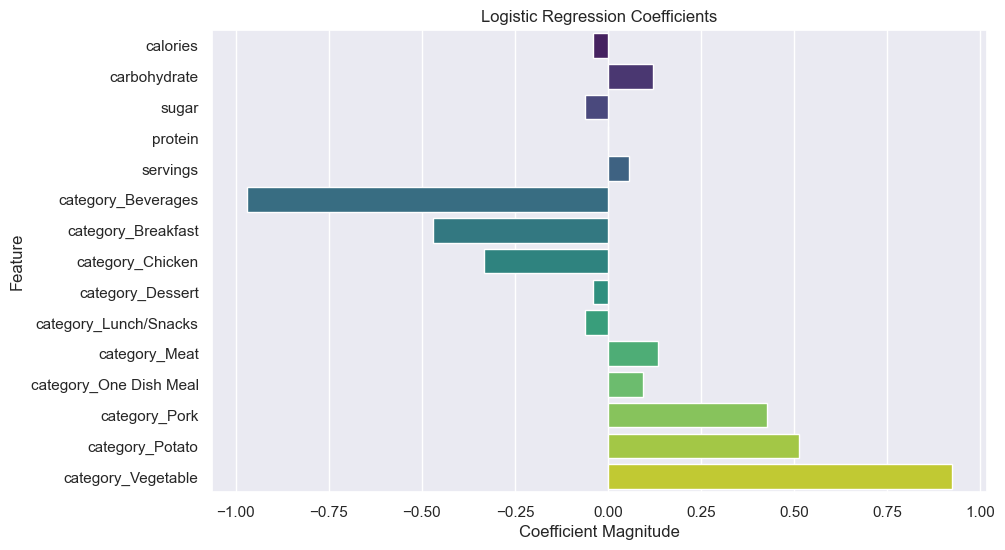

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_coefficients, y=feature_names, palette="viridis")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficients")
plt.show()


In the training results of the Logistic Regression model, Decision Tree and Random Forest models
- The higher the percentage, the better the model performs. the logistic regression prediction is 80% of the actual price, while the Decision Tree model only have 62% and Random forest 74%

# Business Metrics

Solution how to decide if a recipe will be popular
        
- Coffiecient Result from Logistic model shows that features that are relevant with high traffic, recipe category vegetable potato pork can lead high traffic on the other hand beverages not generate as much high traffic
 
The company wants to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes

- Therefore, we would consider using percentage of Accuracy predictions within 80% of the actual high_traffic as a  KPI to compare the 3 models. Logistic Regression model, results successfully adhere to our KPI requirement.



# Summary Recommendation

In summary, the development and assessment of multiple models to achieve objective. Among the various models created, the logistic regression model emerged as the most effective performer. This highlights the logistic regression model as the optimal choice for predicting high traffic recipes, achieving an impressive 80% accuracy in this prediction.

Recipes falling into categories such as "Vegetable," "Potato," or "Pork" exhibit a higher tendency to attract visitors to the website, making them favorable choices for showcasing. Conversely, recipes categorized as "Beverages" typically do not generate as much traffic, suggesting that they may not be the most suitable candidates for featuring on the platform. More traffic means more subscriptions so this is really important to the company.

To ensure sustained model performance and user engagement, we recommend implementing a system for continuous monitoring. This involves regularly updating the model with new data and iterating on features to enhance prediction accuracy over time. By adopting this approach, the platform can adapt to evolving patterns and user preferences, maintaining its effectiveness in predicting high traffic recipes.


